In [1]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]
data_folder = "../data/processed/covid/"

In [13]:
cmp = pd.read_csv(data_folder+"compliance_encode.csv", index_col='record_id')
date = pd.read_csv(data_folder+"policy_data.csv", index_col='record_id', 
                   usecols=['record_id', 'date_announced'], 
                   parse_dates=['date_announced'])
enf = pd.read_csv(data_folder+"enforcer_encode.csv", index_col='record_id')
grp_m = pd.Grouper(key='date_announced', freq='M')
b4_2021 = pd.Timestamp('2021-01-01')

In [14]:
enf = enf.join(date, on='record_id', how='inner')
enf = enf.loc[enf.date_announced < b4_2021]
cmp = cmp.join(date, on='record_id', how='inner')
cmp = cmp.loc[cmp.date_announced < b4_2021]

In [4]:
cmp

,Voluntary/Recommended but No Penalties,Mandatory with Exceptions,Mandatory: Jail Time,Mandatory: Other,Mandatory: Unspecified,Mandatory: Fines,date_announced
record_id,,,,,,,
R_1gShvNnZtOkb4X1NA,True,False,False,False,False,False,2020-01-22
R_3GrLmE8y71iEe17NA,False,False,False,False,True,False,2020-01-22
R_1Hi5XBHB1zBOJc7NA,False,False,False,False,True,False,2020-01-22
R_3EQBDJGMTKwowKOAq,False,False,False,False,True,False,2020-01-22
R_1OoGDBSpbZQ02oANA,False,False,False,False,True,False,2020-01-22
...,...,...,...,...,...,...,...
R_1K0WUazA1VYYZxVNA,True,False,False,False,False,False,2020-05-11
R_3fPEv3U7VviQZonNA,False,False,True,False,False,False,2020-02-11
R_2CBB0gC43BX2UJcBs,True,False,False,False,False,False,2020-04-21


In [11]:
def v(df):
    df = df.drop('date_announced', axis=1)
    df = df.loc[df.any(axis=1)]
    return pd.Series(df.sum()/len(df))

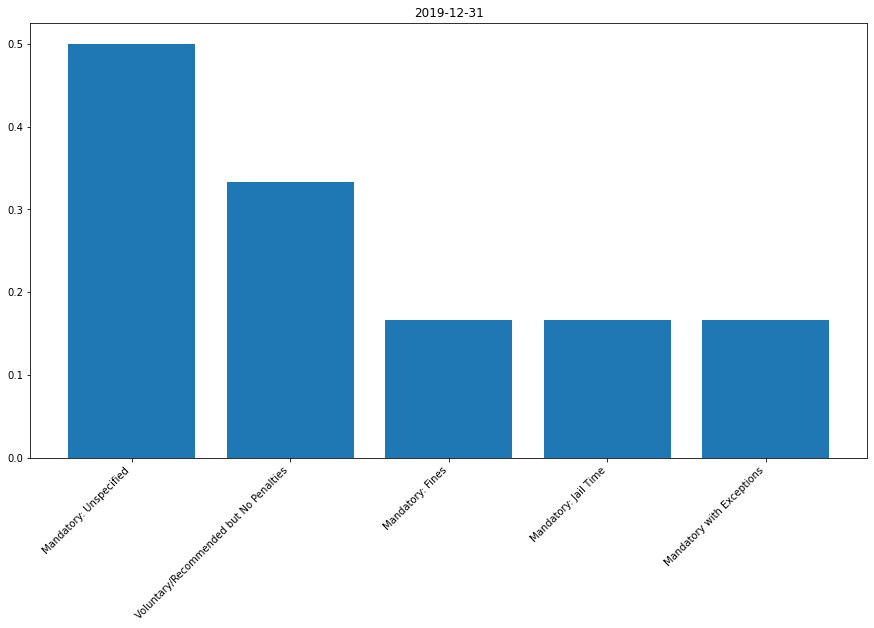

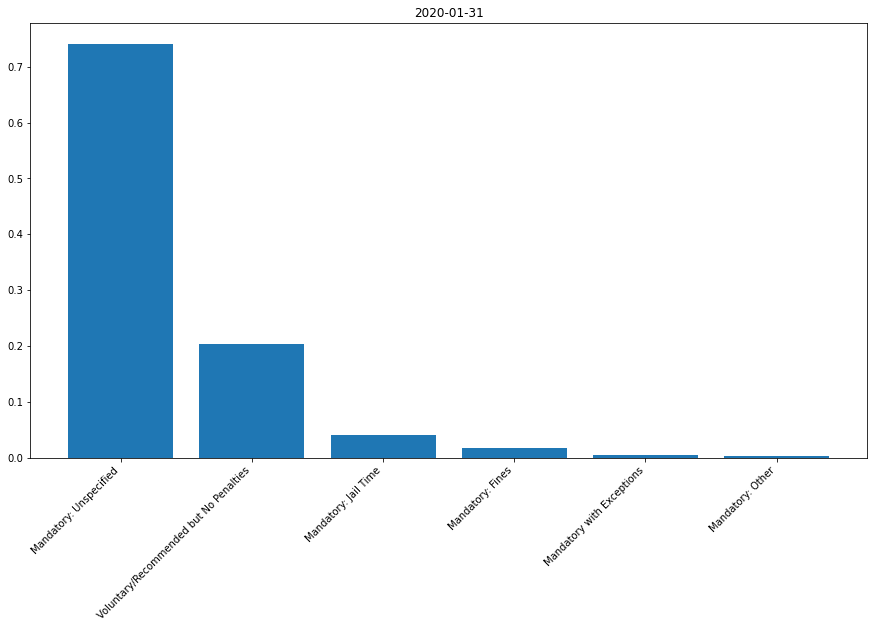

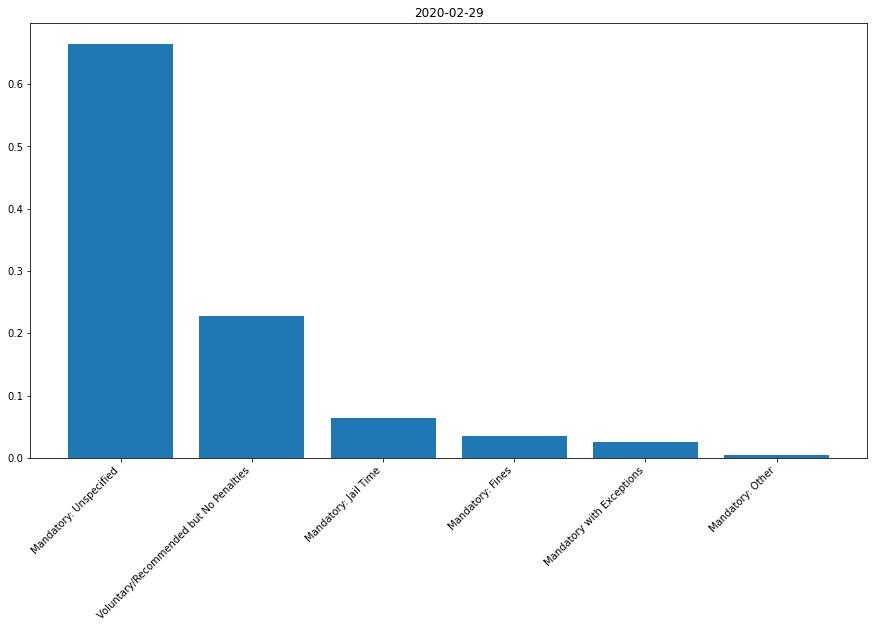

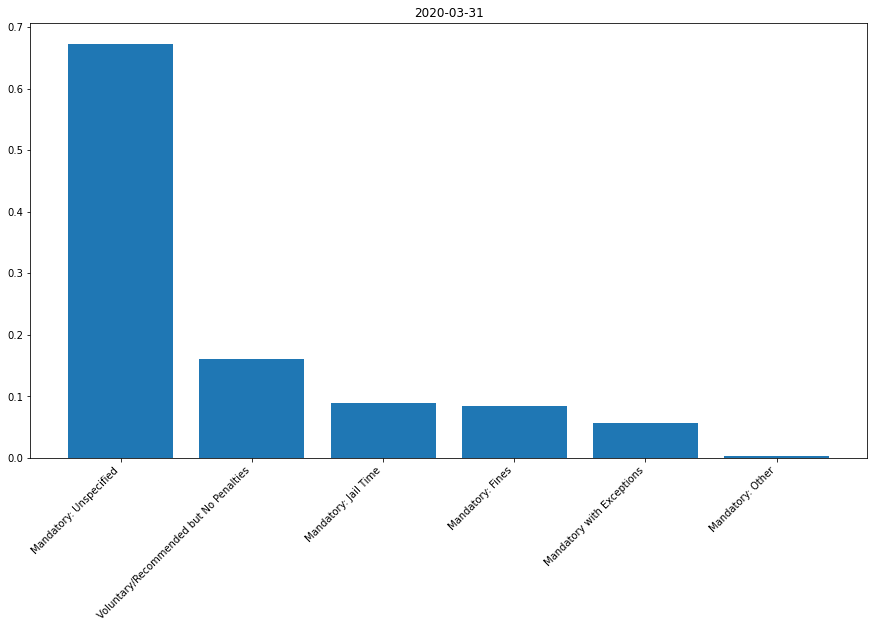

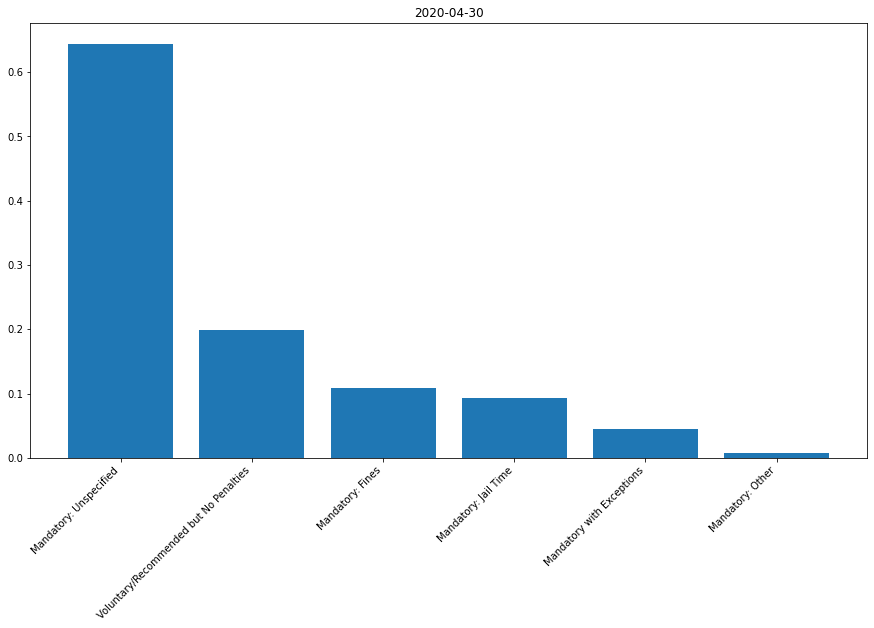

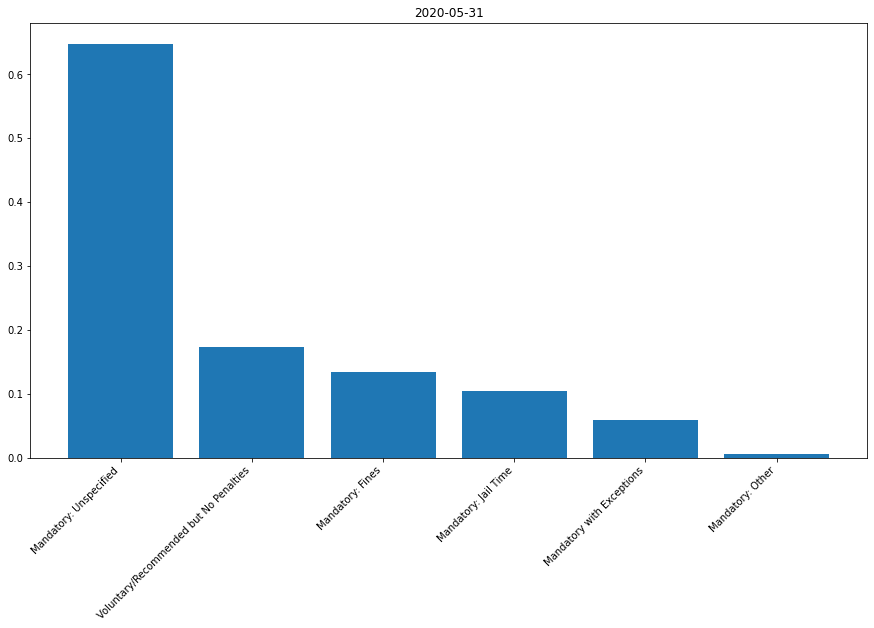

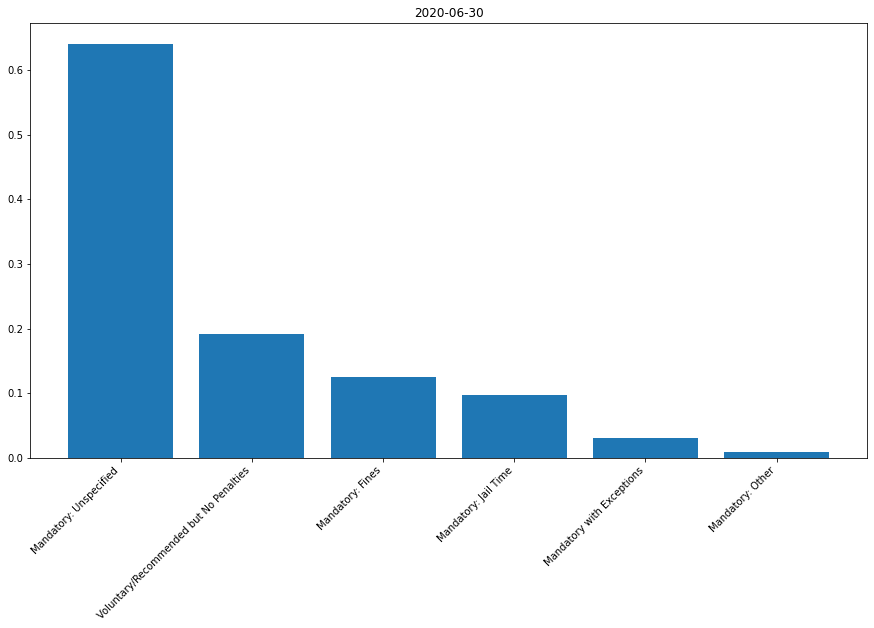

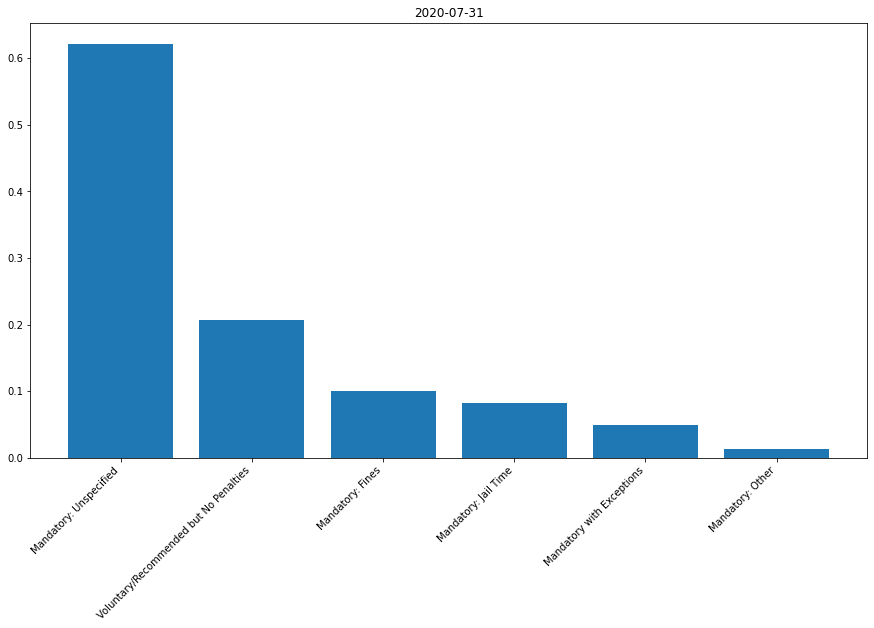

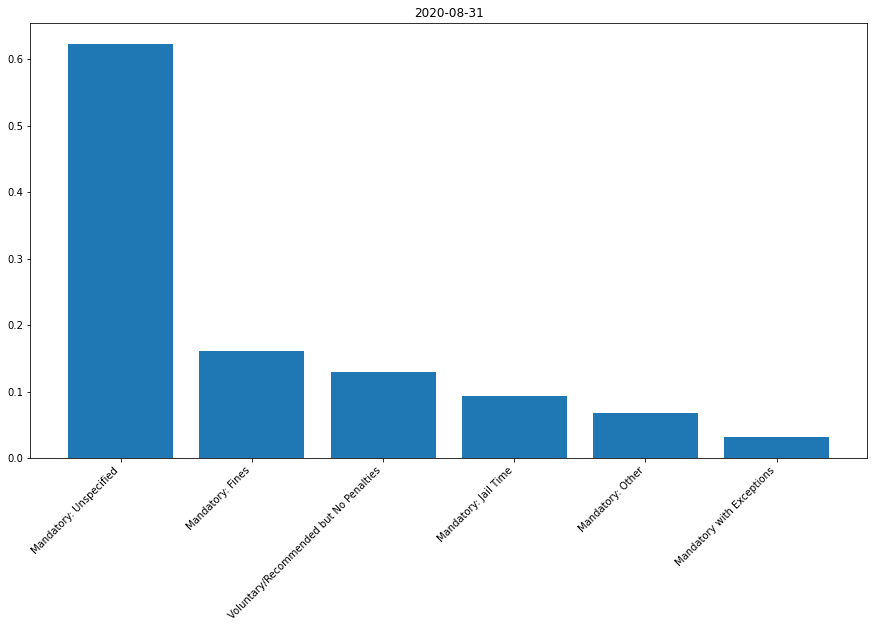

In [10]:
cg = cmp.groupby(grp_m).apply(v)
for i, c in cg.iterrows():
    d = c[c>0].sort_values(ascending=False)
    if len(d) > 0:
        plt.xticks(rotation=45, ha='right')
        plt.title(i.date())
        b = plt.bar(d.index, d)
        plt.show()

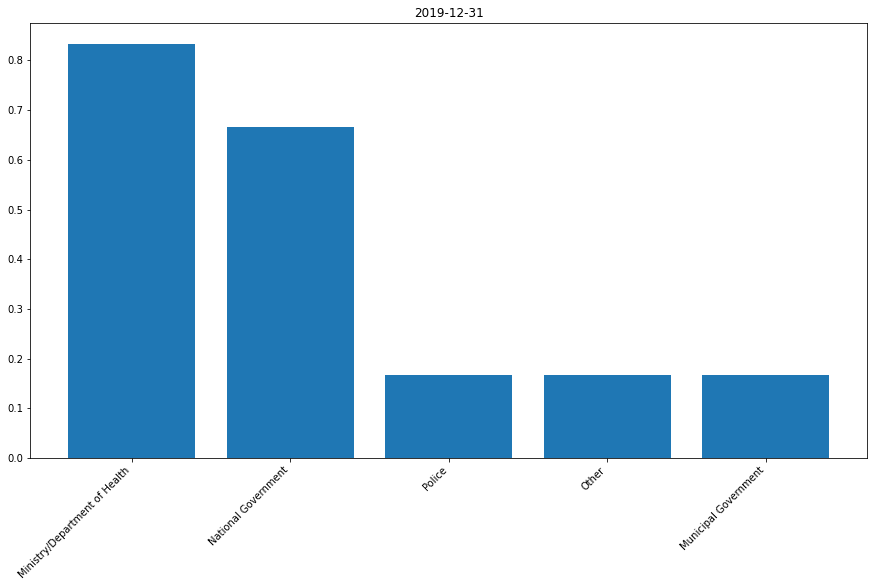

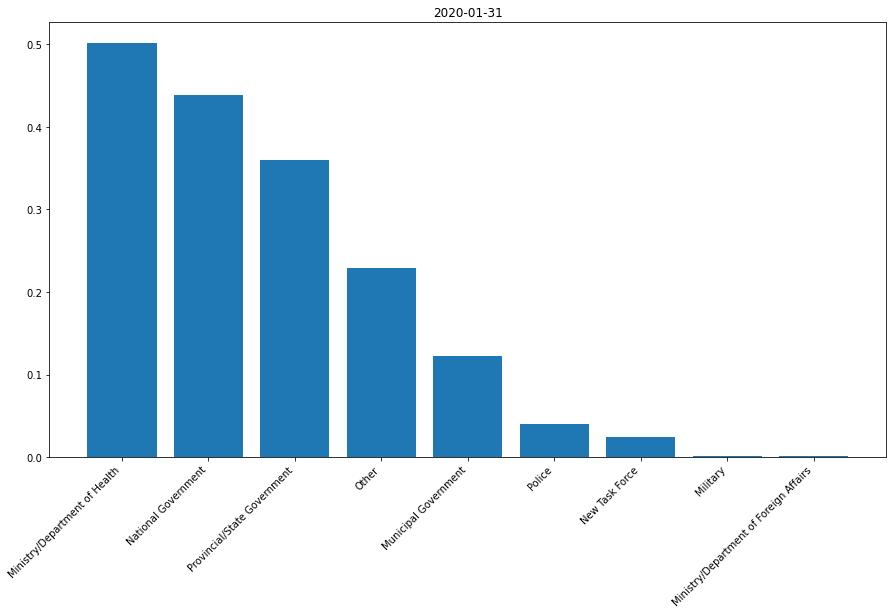

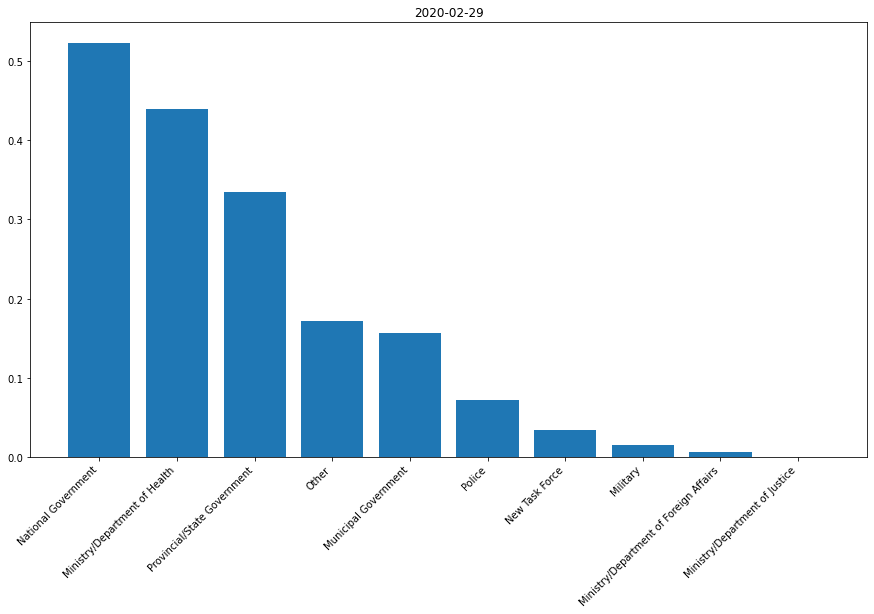

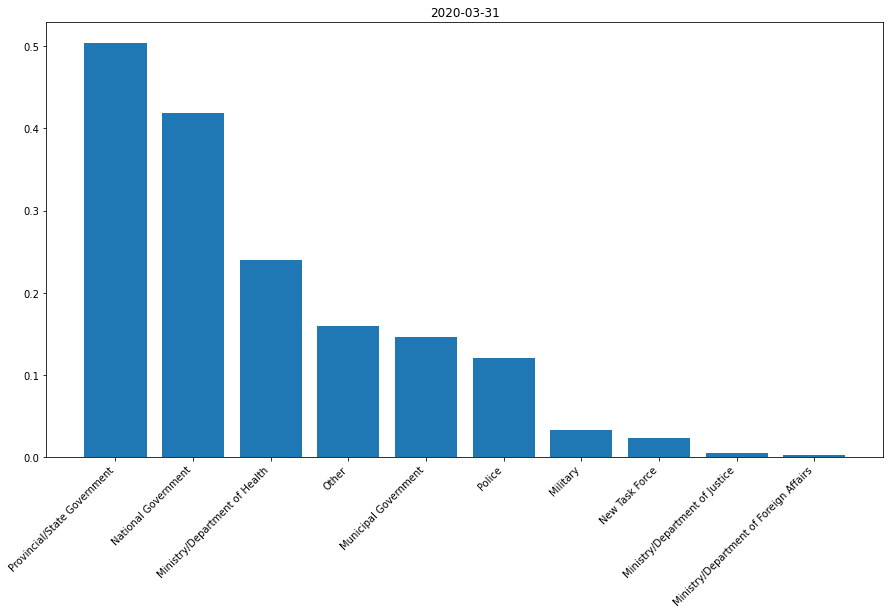

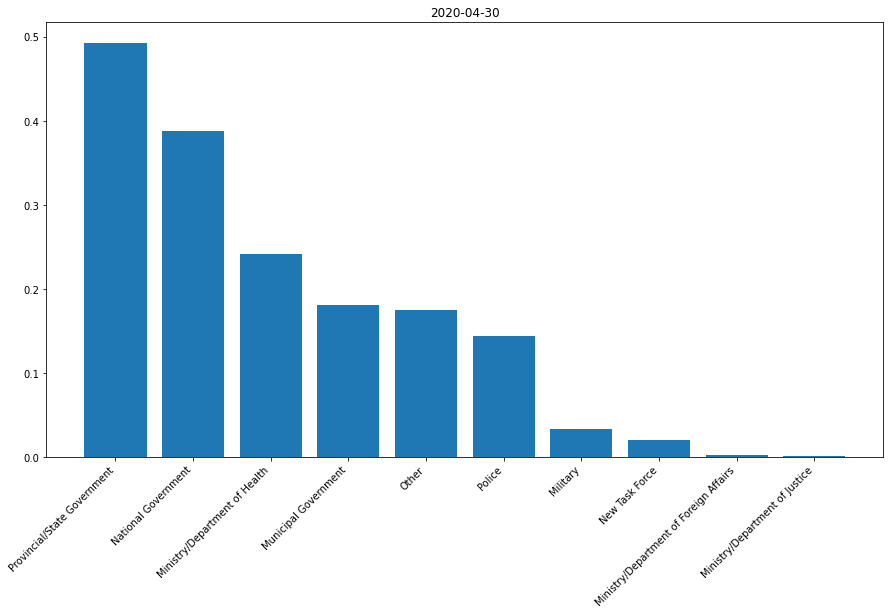

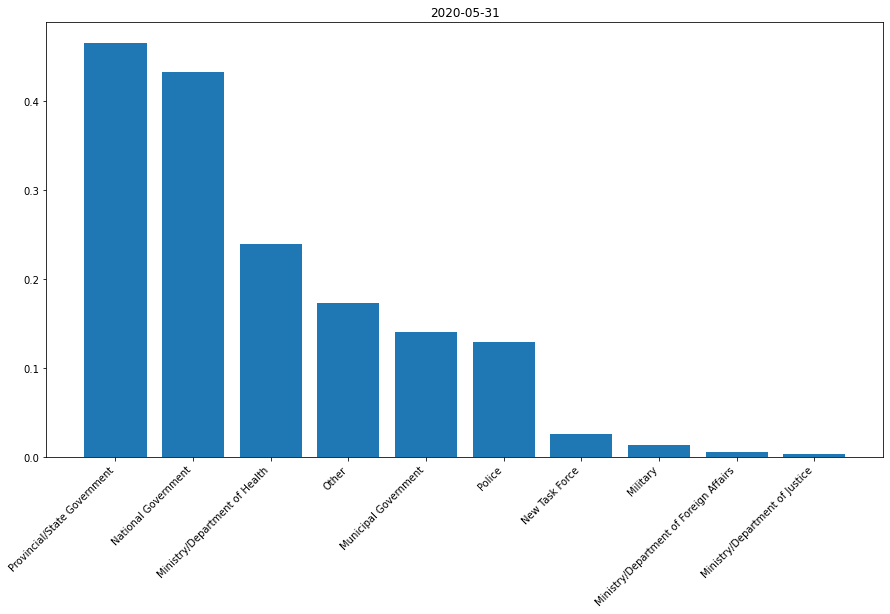

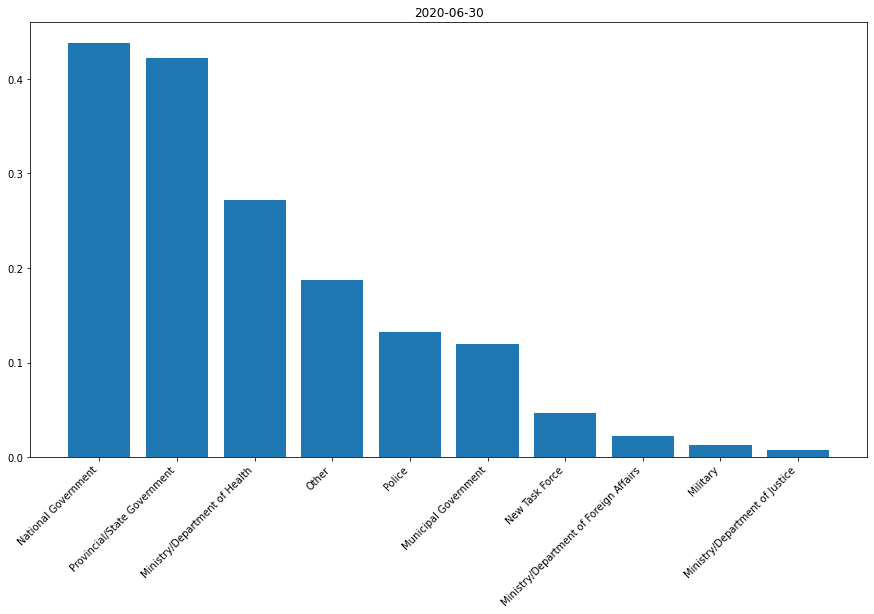

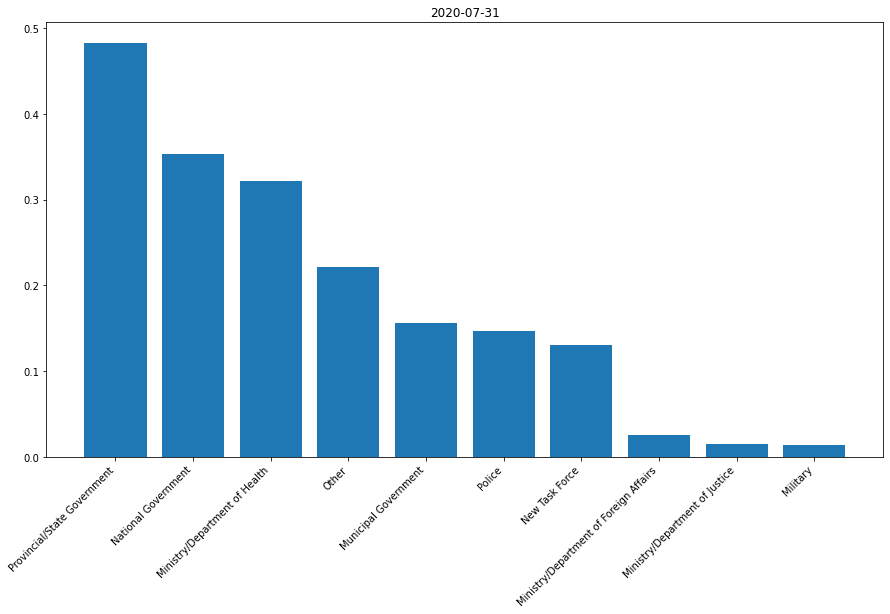

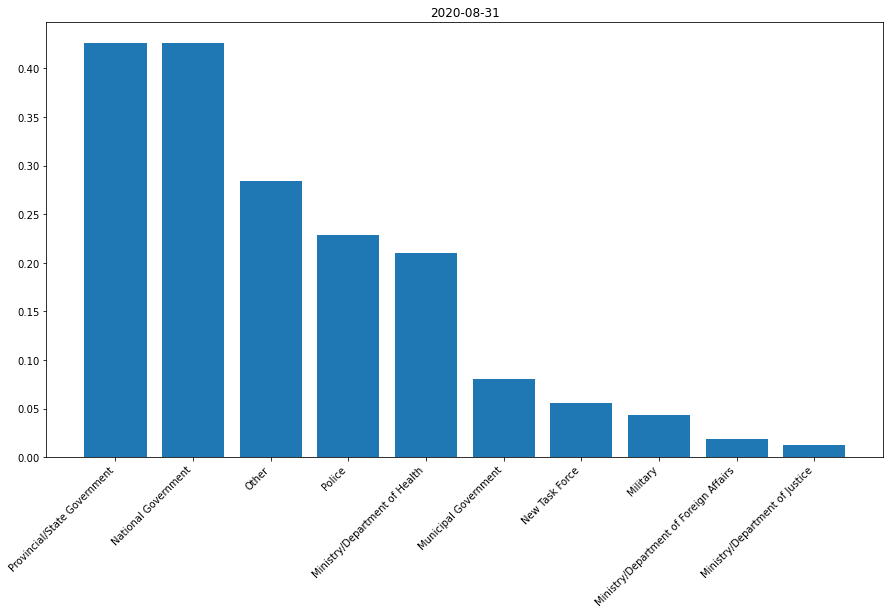

In [15]:
eg = enf.groupby(grp_m).apply(v)
for i, e in eg.iterrows():
    d = e[e>0].sort_values(ascending=False)
    if len(d) > 0:
        plt.xticks(rotation=45, ha='right')
        plt.title(i.date())
        b = plt.bar(d.index, d)
        plt.show()